# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.073725e+01     7.780885e+00
 * time: 0.0016641616821289062
     1     2.903924e+01     5.105512e+00
 * time: 0.007436990737915039
     2     2.082109e+01     4.765375e+00
 * time: 0.01561117172241211
     3     1.457364e+01     3.729034e+00
 * time: 0.06060600280761719
     4     1.132778e+01     1.638644e+00
 * time: 0.06489419937133789
     5     9.646758e+00     1.273297e+00
 * time: 0.0690920352935791
     6     9.404572e+00     1.895638e+00
 * time: 0.07284116744995117
     7     8.962728e+00     1.366538e+00
 * time: 0.07874917984008789
     8     8.579561e+00     1.061415e+00
 * time: 0.08379721641540527
     9     8.307521e+00     8.559643e-01
 * time: 0.08900904655456543
    10     8.190636e+00     6.895655e-01
 * time: 0.09407520294189453
    11     8.109245e+00     7.813544e-01
 * time: 0.09934210777282715
    12     8.037134e+00     4.559812e-01
 * time: 0.10550498962402344
    13     7.997999e+00     6.209402e-01
 * tim

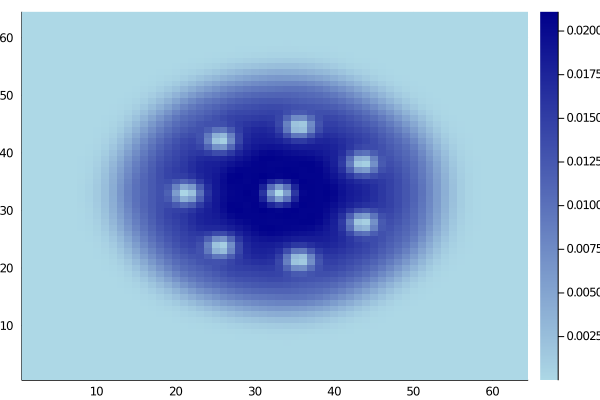

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)